## Transfer Learning Inception V3 using Keras

Please download the dataset from the below url

In [1]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
session = InteractiveSession(config=config)

In [2]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob


In [3]:
IMAGE_SIZE = [224, 224]

train_path = 'Datasets/train'
valid_path = 'Datasets/test'


In [4]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



In [5]:
for layer in inception.layers:
    layer.trainable = False

In [6]:
folders = glob('Datasets/train/*')

In [7]:
x = Flatten()(inception.output)

In [8]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [9]:
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [10]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [12]:
training_set = train_datagen.flow_from_directory('Datasets/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [13]:
test_set = test_datagen.flow_from_directory('Datasets/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [14]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=25,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

C:\Users\SHIVAM~1\AppData\Local\Temp/ipykernel_2104/3764099264.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/25
61/61 [==============================] - 123s 2s/step - loss: 1.6612 - accuracy: 0.7719 - val_loss: 0.0440 - val_accuracy: 1.0000
Epoch 2/25
61/61 [==============================] - 78s 1s/step - loss: 0.7190 - accuracy: 0.8785 - val_loss: 0.1787 - val_accuracy: 0.8889
Epoch 3/25
61/61 [==============================] - 78s 1s/step - loss: 0.6790 - accuracy: 0.8954 - val_loss: 0.0107 - val_accuracy: 1.0000
Epoch 4/25
61/61 [==============================] - 78s 1s/step - loss: 0.6325 - accuracy: 0.9124 - val_loss: 0.0770 - val_accuracy: 1.0000
Epoch 5/25
61/61 [==============================] - 76s 1s/step - loss: 0.5704 - accuracy: 0.9180 - val_loss: 1.0364e-05 - val_accuracy: 1.0000
Epoch 6/25
61/61 [==============================] - 77s 1s/step - loss: 0.4912 - accuracy: 0.9329 - val_loss: 0.0259 - val_accuracy: 1.0000
Epoch 7/25
61/61 [==============================] - 76s 1s/step - loss: 0.3933 - accuracy: 0.9385 - val_loss: 0.0699 - val_accuracy: 0.9444
Epoch 8/25
61/6

In [15]:
import matplotlib.pyplot as plt

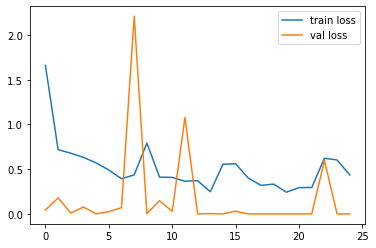

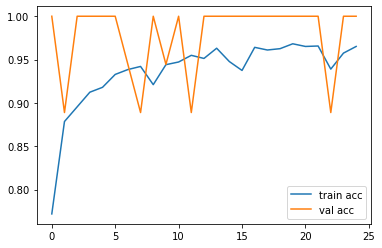

<Figure size 432x288 with 0 Axes>

In [16]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [17]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [33]:

y_pred = model.predict(test_set)


In [34]:
y_pred

array([[1.3766334e-30, 9.9999976e-01, 3.6613667e-14, 1.9191717e-07],
       [1.1085445e-26, 9.9972481e-01, 1.2324951e-12, 2.7519278e-04],
       [1.6175368e-35, 9.9999952e-01, 4.5194278e-07, 2.6529804e-13],
       [1.0658006e-34, 1.0000000e+00, 5.1009942e-17, 1.9947996e-16],
       [4.3175202e-31, 2.3532318e-01, 8.5536339e-10, 7.6467681e-01],
       [3.3068282e-34, 1.0000000e+00, 5.3837435e-15, 9.8708056e-11],
       [0.0000000e+00, 1.0000000e+00, 2.4306116e-20, 1.4492954e-17],
       [5.0306451e-28, 8.8676872e-17, 1.0000000e+00, 3.3860266e-09],
       [1.8946827e-20, 2.2968270e-07, 4.4923010e-05, 9.9995482e-01],
       [1.6966147e-33, 8.8344628e-01, 2.4060502e-11, 1.1655371e-01],
       [0.0000000e+00, 1.0000000e+00, 7.0343314e-36, 3.2385630e-21],
       [0.0000000e+00, 1.0000000e+00, 8.3712003e-31, 5.5032554e-18],
       [2.4966331e-25, 1.3023190e-13, 6.9756875e-06, 9.9999297e-01],
       [2.3285987e-13, 1.5164318e-08, 9.9984491e-01, 1.5502272e-04],
       [6.0335971e-34, 3.1024676e-

In [35]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [36]:
y_pred

array([1, 1, 1, 1, 3, 1, 1, 2, 3, 1, 1, 1, 3, 2, 3, 2, 3, 1], dtype=int64)

In [37]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [2]:
model=load_model('model_resnet50.h5')

In [39]:
img_data

array([[[[ 6.7060997e+01,  5.4221001e+01,  4.7320000e+01],
         [ 6.9060997e+01,  5.6221001e+01,  4.9320000e+01],
         [ 7.3060997e+01,  6.0221001e+01,  5.3320000e+01],
         ...,
         [ 7.4060997e+01,  5.6221001e+01,  4.6320000e+01],
         [ 5.5060997e+01,  3.7221001e+01,  2.7320000e+01],
         [ 4.1060997e+01,  2.3221001e+01,  1.3320000e+01]],

        [[ 7.5060997e+01,  6.2221001e+01,  5.5320000e+01],
         [ 7.8060997e+01,  6.5221001e+01,  5.8320000e+01],
         [ 8.1060997e+01,  6.8221001e+01,  6.1320000e+01],
         ...,
         [ 9.7060997e+01,  7.9221001e+01,  6.9320000e+01],
         [ 7.3060997e+01,  5.5221001e+01,  4.5320000e+01],
         [ 4.9060997e+01,  3.1221001e+01,  2.1320000e+01]],

        [[ 8.7060997e+01,  7.4221001e+01,  6.7320000e+01],
         [ 9.0060997e+01,  7.7221001e+01,  7.0320000e+01],
         [ 9.3060997e+01,  8.0221001e+01,  7.3320000e+01],
         ...,
         [ 1.0106100e+02,  8.3221001e+01,  7.3320000e+01],
         [

In [11]:
img=image.load_img('Datasets/Test/Coffee/download (2).jpg',target_size=(224,224))



In [12]:
x=image.img_to_array(img)
x

array([[[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[254., 254., 254.],
        [254., 254., 254.],
        [254., 254., 254.],
        ...,
        [254., 254., 254.],
        [255., 255., 255.],
        [255., 255., 255.]],

       ...,

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.],
        ...,
        [255., 255., 255.],
        [255., 255., 255.],
        [255., 255., 255.]],

       [[255., 255., 255.],
        [255., 255., 255.],
        [255., 2

In [13]:
x.shape

(224, 224, 3)

In [14]:
x=x/255

In [15]:
import numpy as np
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [16]:
model.predict(img_data)

array([[0.9745471, 0.0254529]], dtype=float32)

In [17]:
a=np.argmax(model.predict(img_data), axis=1)

In [102]:
a==1

array([ True])

In [18]:
import tensorflow as tf

In [19]:
tf.__version__

'2.2.0'